## Gradient Descent

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

Let's find the minimum of the paraboloid function: $$f(x) =  x² + y²$$


In [2]:
# Function definition
f  = lambda X:      X[0]**2 + X[1]**2    # Function
df = lambda X: [2*X[0] , 2*X[1]]         # Gradient

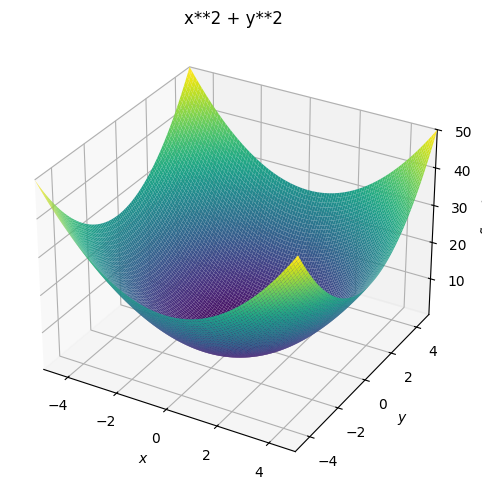

In [11]:
# Lets plot the function
from sympy import symbols
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(5,5))

Initial point: [-1.668655794087115, -4.755374573481472] [-3.33731158817423, -9.510749146962944]


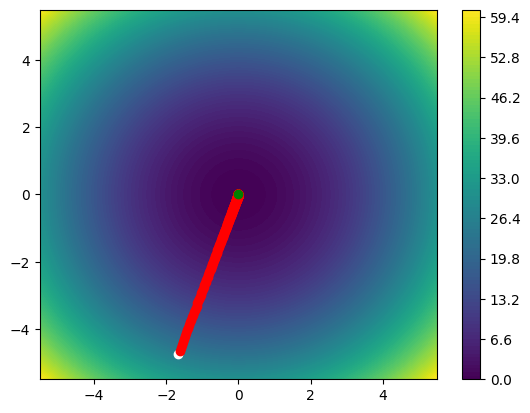

Solution: [-2.8082932318778834e-09, -8.003140178504061e-09] 7.193676359299715e-17


In [5]:
# Prepare the data to draw the contour map of Z
res = 100 # Resolution
r=5.5 # Range

X=np.linspace(-r,r,res)
Y=np.linspace(-r,r,res)
Z=np.zeros((res,res))

for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

# Draw the contour map of Z
plt.contourf(X,Y,Z,res)
plt.colorbar()

# Generate a random initial point and plot it in white
P=[random.uniform(-5,5), random.uniform(-5,5)]
plt.plot(P[0],P[1],"o",c="white")

# Learning rate. Fixed. It would be more effective to reduce it as we get closer.
LR=0.01

# Start optimization
print("Initial point:" , P , df(P))
for _ in range(1000):
  grad = df(P)
  P[0],P[1] = P[0] - LR*grad[0], P[1] - LR*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

# Draw the final point and plot it in green
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solution:" , P , f(P))


Next we are going to optimize the following function:

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$


In [6]:
#Definimos la funcion
import math
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )
df = lambda X: [X[0]*math.cos(2*X[0] - math.exp(X[1]) + 1)*math.cos(X[0]**2/2 - X[1]**2/4 + 3) - 2*math.sin(2*X[0] - math.exp(X[1]) + 1)*math.sin(X[0]**2/2 - X[1]**2/4 + 3),
                math.exp(X[1])*math.sin(2*X[0] - math.exp(X[1]) + 1)*math.sin(X[0]**2/2 - X[1]**2/4 + 3) - 1/2 * X[1] * math.cos(2*X[0] - math.exp(X[1]) + 1)*math.cos(X[0]**2/2 - X[1]**2/4 + 3)]         #Gradiente
df([1,1])

[-0.8947823816559543, 0.3957070768597216]

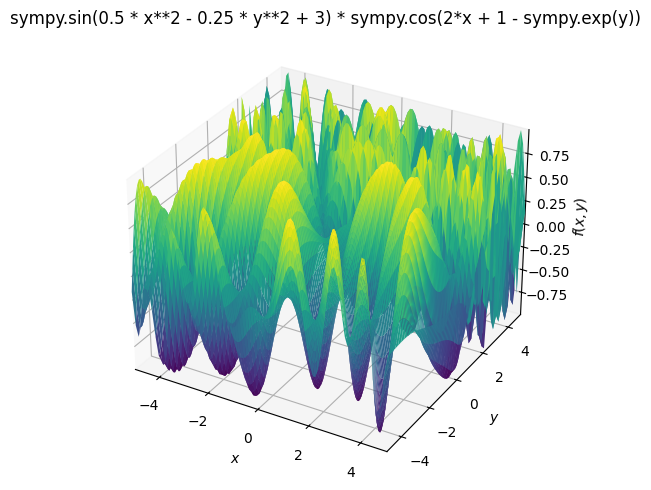

In [12]:
# Plot the function
import sympy
x,y = symbols('x y')
plot3d(sympy.sin(0.5 * x**2 - 0.25 * y**2 + 3) * sympy.cos(2*x + 1 - sympy.exp(y)),
       (x,-5,5),(y,-5,5),
       title='sympy.sin(0.5 * x**2 - 0.25 * y**2 + 3) * sympy.cos(2*x + 1 - sympy.exp(y))',
       size=(5,5))

Initial point: [1.0442013598190023, -0.8759422182909384] [1.1005917515017691, 0.34220665420096624]


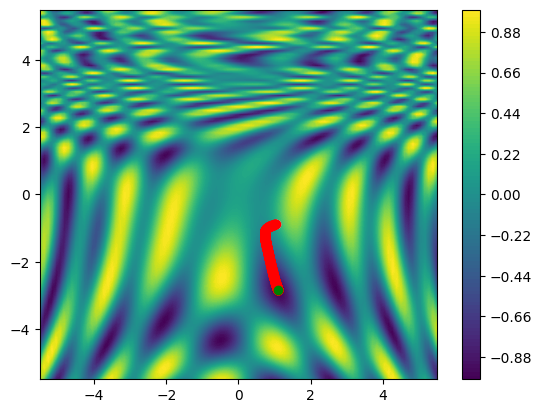

Solution: [1.0996463222043789, -2.852224243863816] -0.9999999996962564


In [10]:
# Prepare the data to draw the contour map of Z
res = 100 # Resolution
r=5.5 # Range

X=np.linspace(-r,r,res)
Y=np.linspace(-r,r,res)
Z=np.zeros((res,res))

for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

# Draw the contour map of Z
plt.contourf(X,Y,Z,res)
plt.colorbar()

# Generate a random initial point and plot it in white
P=[random.uniform(-5,5), random.uniform(-5,5)]
plt.plot(P[0],P[1],"o",c="white")

# Learning rate. Fixed. It would be more effective to reduce it as we get closer.
LR=0.01

# Start optimization
print("Initial point:" , P , df(P))
for _ in range(1000):
  grad = df(P)
  P[0],P[1] = P[0] - LR*grad[0], P[1] - LR*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

# Draw the final point and plot it in green
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solution:" , P , f(P))
